## 1. Swedish demographic data (*)
#Go to Swedish-language wikipedia page Sveriges demografi.

In [2]:
import pandas as pd
import numpy as np
import plotly_express as px 
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [53]:
link="https://sv.wikipedia.org/wiki/Sveriges_demografi"
import pandas as pd
tables_sve=pd.read_html(link,decimal="," ,thousands=" ")
#tables_sve

 # a)
  Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [54]:
from1900 = tables_sve[5] # 0 is first table in the html page ,5 is sexth table in this page
from1900=from1900.rename(columns={"Unnamed: 0": "År"})
from1900

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,27.0,16.8,10.2,4.02
1,1901,5156000,139370,82772,56598,27.0,16.1,11.0,4.04
2,1902,5187000,137364,79722,57642,26.5,15.4,11.1,3.95
3,1903,5210000,133896,78610,55286,25.7,15.1,10.6,3.82
4,1904,5241000,134952,80152,54800,25.7,15.3,10.5,3.83
...,...,...,...,...,...,...,...,...,...
116,2016,9995000,117425,90982,26443,11.8,9.2,2.6,1.85
117,2017,10120000,115416,91972,23444,11.4,9.1,2.3,1.79
118,2018,10230000,115832,92185,23647,11.3,9.0,2.3,1.75
119,2019,10327589,114523,88766,28727,11.1,8.7,2.4,1.70


In [51]:
# another method to read Specified tables direct ,using match("")
from1900 = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", match="Födda",decimal="," ,thousands=" ")[0]
from1900.head()
# match 正则表达式，返回与正则表达式匹配的表格。[0]: 这里是含有Födda 这个词的第一个表格
#decimal十进制 ,小数点标示，默认使用“.” 原数据是10,2 如果不适用这一代码出来的数据成了102
#thousands=' '千位分隔符 Defaults to ','.

,Unnamed: 0,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,27.0,16.8,10.2,4.02
1,1901,5156000,139370,82772,56598,27.0,16.1,11.0,4.04
2,1902,5187000,137364,79722,57642,26.5,15.4,11.1,3.95
3,1903,5210000,133896,78610,55286,25.7,15.1,10.6,3.82
4,1904,5241000,134952,80152,54800,25.7,15.3,10.5,3.83


# b) 
Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

# Bar Chart

In [56]:
import matplotlib.pyplot as plt
import plotly_express as px 

fig=px.bar(from1900 ,x="År",y="Folkmängd",title="Sweden population 1900-2020",log_y=True,color="År")
fig.show()

Text(0.5, 1.0, 'Befolkningsförändringar vs År')

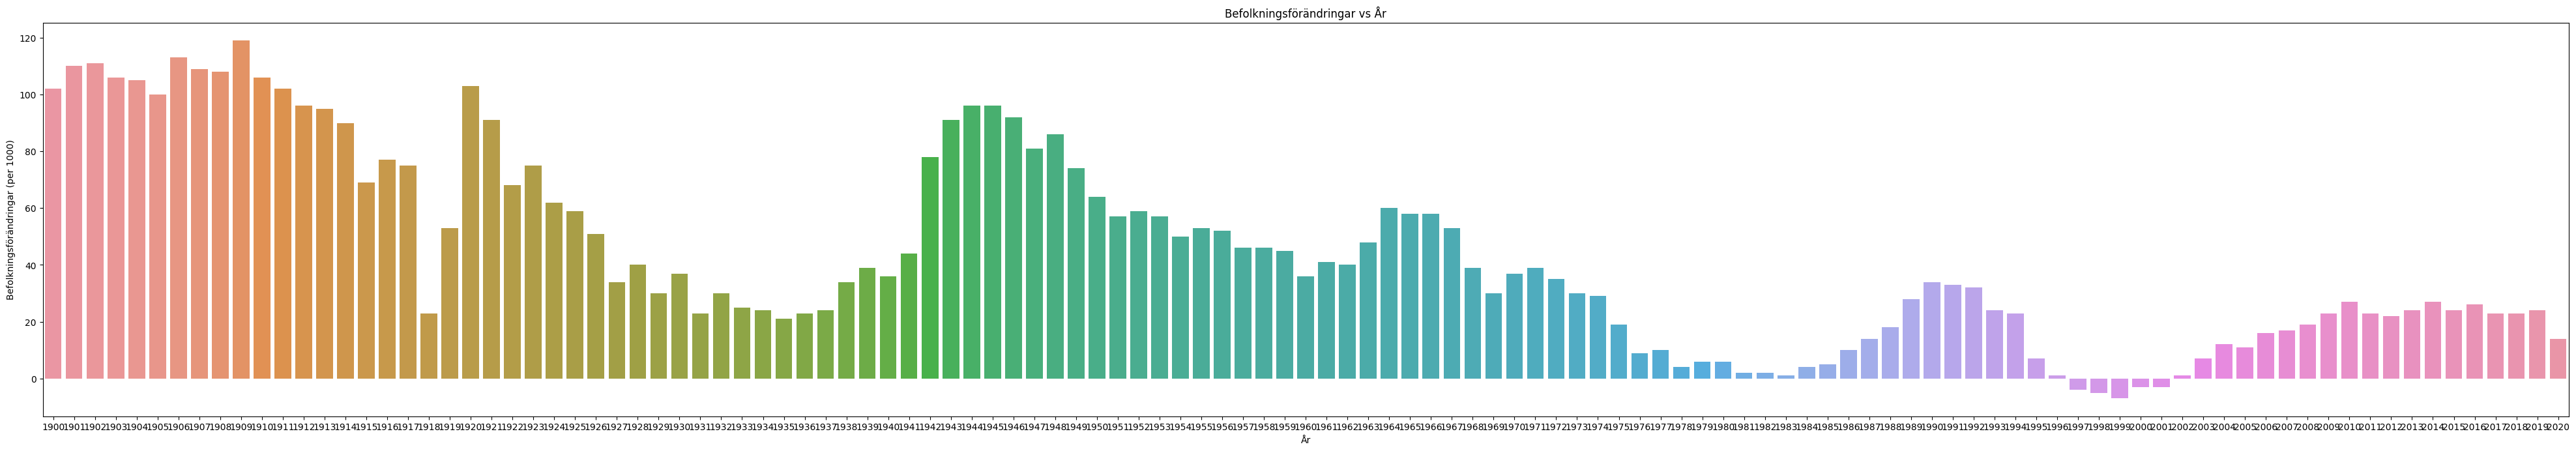

In [515]:
import seaborn as sns
fig = plt.figure(dpi=100, figsize=(50,8))
sns.barplot(data=from1900 , y="Befolkningsförändringar (per 1000)", x="År").set_title("Befolkningsförändringar vs År")

# Line Chart

In [57]:

fig=px.line(from1900,x="År",y="Folkmängd",title="Swedish population from 1900 to 2020",range_x=[1900,2020],log_y=True)
             #labels={"År":"Year","Folkmängd":"Population"},
fig.show()
 #labels={"År":"Year","Folkmängd":"Population"}
 # markers=True 
 

In [58]:
fig = px.line(from1900, x="År", y= "Total fertilitet", title="The average number of children a woman has in Sweden from 1900", 
               labels={"År": "Year", "Total fertilitet": "number of children"}, markers=True)
fig.show()

In [59]:
fig = px.line(from1900, x="År", y=["Födda", "Döda"], 
               title="The number of newborn and death in Sweden from 1900 to 2000", markers=True)
fig.show()

#   c)
 Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865.

In [74]:
link="https://sv.wikipedia.org/wiki/Sveriges_demografi"
before1900= pd.read_html(link,header=[1],decimal=',',thousands=" ")[1]  #header=[0]是第0行大标题，header=[1] 是第1行大标题
before1900

,Vid utgången av år,Folkmängd,Totalt,Promille
0,1570,900 000,—,—
1,1650,1 225 000,4 063,3.86
2,1700,1 485 000,5 200,3.86
3,1720,1 350 000,−6 750,"−4,75"
4,1755,1 878 000,15 086,9.48
5,1815,2 465 000,9 783,4.54
6,1865,4 099 000,32 680,10.22
7,1900,5 140 000,29 743,6.48
8,2000,8 861 000,NaN,NaN
9,2020,10 379 000,NaN,NaN


 # d) 
 Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways.

In [76]:
# 这一步的目的是为了后面的合并做准备
new_from1900=from1900.iloc[:,[0,1,4,7]]# 利用iloc提取列数据,这里表示提取第0列，第1列，第4列和第7列
new_from1900
# df_new=from1900.drop(["Födda",	"Döda", "Nativiteten (per 1000)",	"Dödstalen (per 1000)","Total fertilitet" ], axis=1)  # axis 默认为0，指删除行，因此删除columns时要指定axis=1；

,År,Folkmängd,Befolkningsförändringar,Befolkningsförändringar (per 1000)
0,1900,5117000,51993,10.2
1,1901,5156000,56598,11.0
2,1902,5187000,57642,11.1
3,1903,5210000,55286,10.6
4,1904,5241000,54800,10.5
...,...,...,...,...
116,2016,9995000,26443,2.6
117,2017,10120000,23444,2.3
118,2018,10230000,23647,2.3
119,2019,10327589,28727,2.4


In [77]:
#保留到1865年的
new_before1900=before1900.drop(index=[7,8,9,10]).rename(columns={
                                                              "Vid utgången av år":"År",
                                                              "Totalt":"Befolkningsförändringar", 
                                                               "Promille": "Befolkningsförändringar (per 1000)"
                                                               }
                                                               )

                                       
new_before1900

,År,Folkmängd,Befolkningsförändringar,Befolkningsförändringar (per 1000)
0,1570,900 000,—,—
1,1650,1 225 000,4 063,3.86
2,1700,1 485 000,5 200,3.86
3,1720,1 350 000,−6 750,"−4,75"
4,1755,1 878 000,15 086,9.48
5,1815,2 465 000,9 783,4.54
6,1865,4 099 000,32 680,10.22


In [156]:
import pandas as pd
sweden=pd.concat([new_before1900,new_from1900],ignore_index=True)
sweden

,År,Folkmängd,Befolkningsförändringar,Befolkningsförändringar (per 1000)
0,1570,900 000,—,—
1,1650,1 225 000,4 063,3.86
2,1700,1 485 000,5 200,3.86
3,1720,1 350 000,−6 750,"−4,75"
4,1755,1 878 000,15 086,9.48
...,...,...,...,...
123,2016,9995000,26443,2.6
124,2017,10120000,23444,2.3
125,2018,10230000,23647,2.3
126,2019,10327589,28727,2.4


# e) 
Draw a graph of population data from 1570-2020.

In [159]:
import plotly_express as px 

fig = px.line(sweden, x="År", y="Folkmängd", title=" Swedish population change from 1570 to 2020",
               labels={"År": "Year", "Folkmängd": "Population"},
               range_x=[1570,2020])
                 
fig.show()



# 2. Denmark demographic data (*)
Go to the Danish-language wikipedia page Danmarks demografi.

  # a) 
  Read in the table under "Demografiske data" into a DataFrame (*)

 

In [160]:
link="https://da.wikipedia.org/wiki/Danmarks_demografi"
import pandas as pd
tables_dk=pd.read_html(link,thousands=".",)
#tables_danmark

In [161]:
danmark = tables_dk[0]
danmark.head()

,År,Befolkning pr. 1. januar,År.1,Befolkning pr. 1. januar.1
0,800,500.000[5],NaN,NaN
1,1200,1.000.000[5],NaN,NaN
2,1769,797584,1976.0,5065313.0
3,1787,841806,1977.0,5079879.0
4,1801,929001,1978.0,5096959.0


In [165]:
danmark = tables_dk[0] # 0 is first table in the html page
danmark=danmark.rename (columns={"År.1": "År" }
                          )
danmark=danmark.drop(index=[0,1])# 去掉前两行
danmark["År"]=danmark["År"].astype(int) #修改类型到INT,由元钱的1976.0变成 1976
danmark["Befolkning pr. 1. januar"]=danmark["Befolkning pr. 1. januar"].astype(int)
danmark                         

,År,Befolkning pr. 1. januar,År,Befolkning pr. 1. januar.1
2,1769,797584,1976,5065313.0
3,1787,841806,1977,5079879.0
4,1801,929001,1978,5096959.0
5,1834,1230964,1979,5111537.0
6,1840,1289075,1980,5122065.0
7,1845,1356877,1981,5123989.0
8,1850,1414648,1982,5119155.0
9,1855,1507222,1983,5116464.0
10,1860,1608362,1984,5112130.0
11,1870,1784741,1985,5111108.0


In [166]:
danmark=danmark.rename(columns={"Befolkning pr. 1. januar" : "Folkmängd" ,
                                 "Befolkning pr. 1. januar.1" : "Folkmängd"})
danmark

,År,Folkmängd,År,Folkmängd
2,1769,797584,1976,5065313.0
3,1787,841806,1977,5079879.0
4,1801,929001,1978,5096959.0
5,1834,1230964,1979,5111537.0
6,1840,1289075,1980,5122065.0
7,1845,1356877,1981,5123989.0
8,1850,1414648,1982,5119155.0
9,1855,1507222,1983,5116464.0
10,1860,1608362,1984,5112130.0
11,1870,1784741,1985,5111108.0


 # b) 
  Clean the data and draw a graph of population against year from 1769-2020. (**)

In [167]:
#提取前两列为danmark1
#danmark1=danmark.iloc[:,0:2] # 冒号前面是取第几行，冒号后面是取第0，1列
danmark1=danmark.iloc[:,[0,1]]
danmark1.head()

,År,Folkmängd
2,1769,797584
3,1787,841806
4,1801,929001
5,1834,1230964
6,1840,1289075


In [168]:

danmark2=danmark.iloc[:,[2,3]] # 冒号前面是取第几行，冒号后面是取第2，3列
danmark2.head()

,År,Folkmängd
2,1976,5065313.0
3,1977,5079879.0
4,1978,5096959.0
5,1979,5111537.0
6,1980,5122065.0


In [170]:
danmark_population=pd.concat([danmark1,danmark2])
danmark_population

,År,Folkmängd
2,1769,797584.0
3,1787,841806.0
4,1801,929001.0
5,1834,1230964.0
6,1840,1289075.0
...,...,...
29,2003,5383507.0
30,2005,5411405.0
31,2010,5534738.0
32,2015,5659715.0


# Graph of Danish population against year from 1769-2020

In [171]:
import plotly_express as px 

fig = px.line(danmark_population, x="År", y="Folkmängd", title=" Danmark Population change 1769 - 2020",
               labels={"År": "Year", "Folkmängd": "Population"})               
fig.show()

# 3. Norwegian demographic data (*)
Go to Swedish-language wikipedia page Norges demografi.

# a) 
Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [172]:
link="https://sv.wikipedia.org/wiki/Norges_demografi"
import pandas as pd 
tables_norge=pd.read_html(link, thousands=" ", decimal=",")
#tables_norge

In [176]:
norway=tables_norge[2]
norway

,Unnamed: 0,Befolkning i tusentals (x 1000),Födda,Döda,Naturlig förändring,Födelsetal per 1000 invånare,Dödstal per 1000 invånare,Naturlig förändring per 1000 invånare,Total fertilitet
0,1900,2231,66229,35345,30884,29.7,15.8,13.8,NaN
1,1901,2255,67303,33821,33482,29.8,15.0,14.8,NaN
2,1902,2276,66494,31670,34824,29.2,13.9,15.3,NaN
3,1903,2288,65470,33847,31623,28.6,14.8,13.8,NaN
4,1904,2298,64143,32895,31248,27.9,14.3,13.6,NaN
...,...,...,...,...,...,...,...,...,...
108,2008,4768,60497,41712,18785,12.7,8.7,3.9,1.96
109,2009,4829,61807,41449,20358,12.8,8.6,4.2,1.98
110,2010,4889,61442,41500,19942,12.6,8.5,4.1,1.95
111,2011,4953,60220,41393,18827,12.1,8.3,3.8,1.88


In [177]:
norway_swe=norway.rename(columns={"Unnamed: 0":"År",
                                 "Total fertilitet" :"Fertilitet",
                            "Befolkning i tusentals (x 1000)" :"Folkmängd" })
norway_swe=norway_swe.loc[:,["År","Folkmängd","Fertilitet"]]  #提取三列                         
norway_swe

,År,Folkmängd,Fertilitet
0,1900,2231,NaN
1,1901,2255,NaN
2,1902,2276,NaN
3,1903,2288,NaN
4,1904,2298,NaN
...,...,...,...
108,2008,4768,1.96
109,2009,4829,1.98
110,2010,4889,1.95
111,2011,4953,1.88


# b) 
You see some missing data in column "Total fertilitet". Go to the English page and read in the data from "Vital statistics since 1900".

In [192]:
link="https://en.wikipedia.org/wiki/Demographics_of_Norway"
import pandas as pd 
norway_eng=pd.read_html(link,match="Crude birth rate",thousands=" ", decimal=",")[0]

norway_eng

,Unnamed: 0,Average population,Live births,Deaths,Natural change,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rates[fn 1][5][7]
0,1900,"2,231,000",66.229,35.345,30.884,29.7,15.8,13.8,4.40
1,1901,"2,255,000",67.303,33.821,33.482,29.8,15.0,14.8,4.37
2,1902,"2,276,000",66.494,31.670,34.824,29.2,13.9,15.3,4.26
3,1903,"2,288,000",65.470,33.847,31.623,28.6,14.8,13.8,4.16
4,1904,"2,298,000",64.143,32.895,31.248,27.9,14.3,13.6,4.07
...,...,...,...,...,...,...,...,...,...
117,2017,"5,258,000",56.633,40.774,15.859,10.8,7.8,3.0,1.62
118,2018,"5,296,000",55.120,40.840,14.280,10.4,7.7,2.8,1.56
119,2019,"5,328,000",54.495,40.684,13.811,10.2,7.6,2.6,1.53
120,2020,"5,367,580",52.979,40.611,12.368,9.9,7.5,2.4,1.48


In [181]:
norway_eng=norway_eng.rename(columns={"Unnamed: 0": "År", 
                                      "Average population" :"Folkmängd",
                                   "Total fertility rates[fn 1][5][7]": "Fertilitet"})
norway_eng=norway_eng.loc[:,["År","Folkmängd","Fertilitet"]]
                                 
norway_eng

,År,Folkmängd,Fertilitet
0,1900,"2,231,000",4.40
1,1901,"2,255,000",4.37
2,1902,"2,276,000",4.26
3,1903,"2,288,000",4.16
4,1904,"2,298,000",4.07
...,...,...,...
117,2017,"5,258,000",1.62
118,2018,"5,296,000",1.56
119,2019,"5,328,000",1.53
120,2020,"5,367,580",1.48


# c)
 Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet".

In [182]:
norge_eng

NameError: name 'norge_eng' is not defined

In [534]:
norge_swe

,År,Folkmängd,Fertilitet
0,1900,2 231,NaN
1,1901,2 255,NaN
2,1902,2 276,NaN
3,1903,2 288,NaN
4,1904,2 298,NaN
...,...,...,...
108,2008,4 768,196.0
109,2009,4 829,198.0
110,2010,4 889,195.0
111,2011,4 953,188.0


In [565]:
result=pd.merge(norge_eng,norge_swe,on="År")
result

,År,Folkmängd_x,Fertilitet_x,Folkmängd_y,Fertilitet_y
0,1900,2231000,4.40,2 231,NaN
1,1901,2255000,4.37,2 255,NaN
2,1902,2276000,4.26,2 276,NaN
3,1903,2288000,4.16,2 288,NaN
4,1904,2298000,4.07,2 298,NaN
...,...,...,...,...,...
108,2008,4768000,1.96,4 768,196.0
109,2009,4829000,1.98,4 829,198.0
110,2010,4889000,1.95,4 889,195.0
111,2011,4953000,1.88,4 953,188.0


In [193]:
#merge 英文版本下获得的出生率到瑞典语版本的那个文档
#norge_eng=pd.concat[norge_swe.merge(norge_eng)]


# 4. Merge Sweden-Norway (*)
Create a population graph and a fertility graph showing Sweden and Norway.

Text(0.5, 1.0, 'Fertility Sweden')

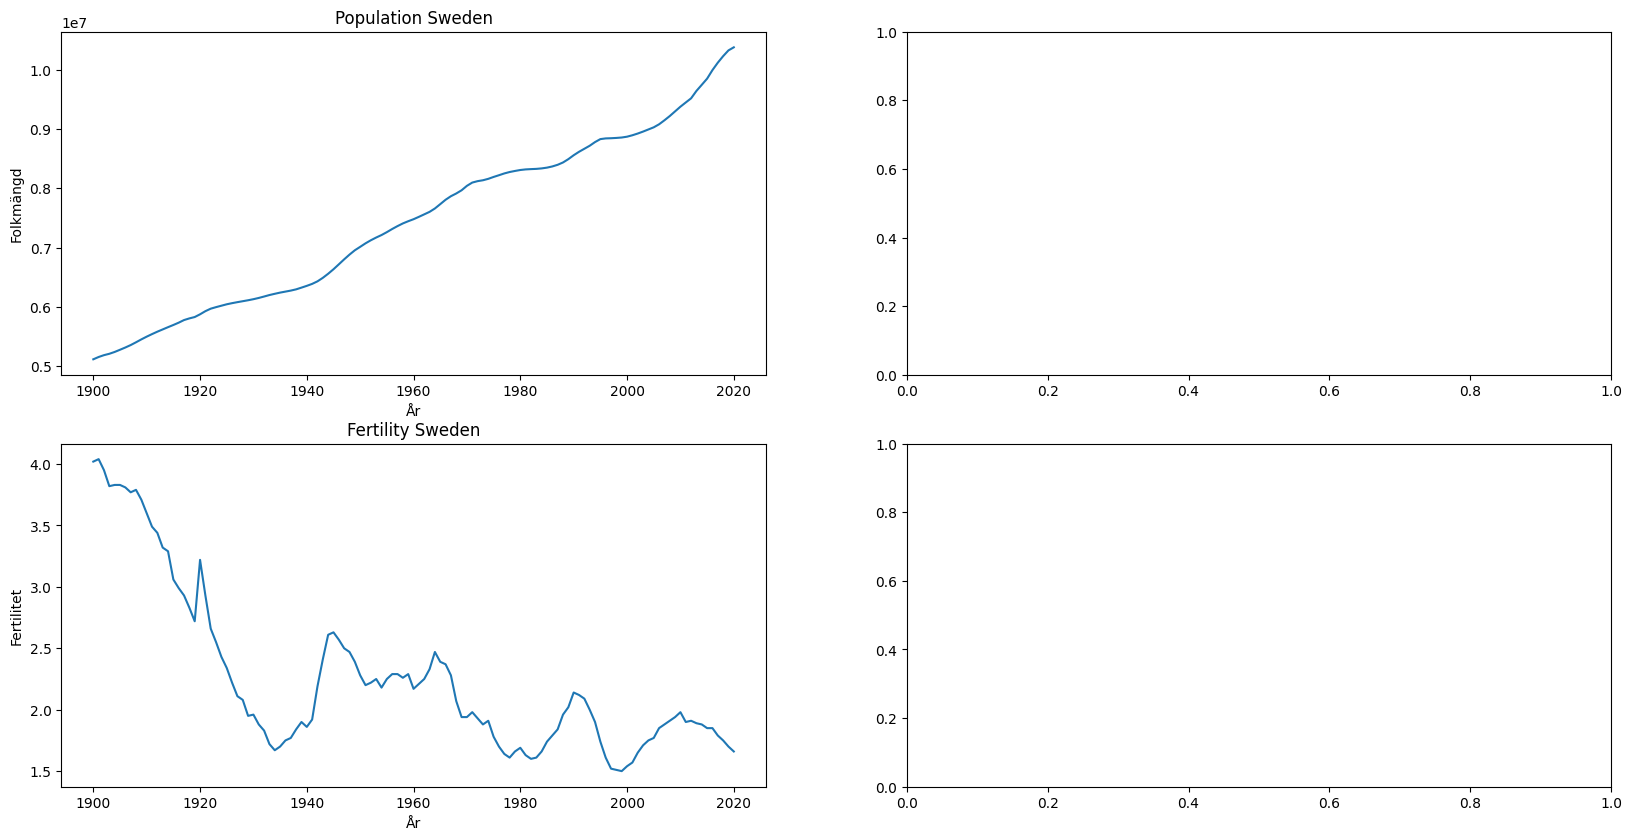

In [195]:
import seaborn as sns 
tables = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", decimal=',', thousands=' ', header=[0])
sweden = tables[5]
sweden = sweden.rename(columns={"Unnamed: 0": "År", "Total fertilitet": "Fertilitet"})
sweden

fig, ax = plt.subplots(2,2, dpi=100, figsize=(20,10))

sns.lineplot(data=sweden, x="År", y="Folkmängd", ax = ax[0,0]).set_title("Population Sweden")
sns.lineplot(data=sweden, x="År", y="Fertilitet", ax = ax[1,0]).set_title("Fertility Sweden")


In [ ]:
from1900

In [ ]:
norge_eng

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, dpi=100, figsize=(20,10))

sns.lineplot(data=from1900, x="År", y="Folkmängd", ax = ax[0,0]).set_title("Population Sweden" )
sns.lineplot(data=from1900, x="År", y="Total fertilitet", ax = ax[1,0]).set_title("Fertility Sweden")
